# 1. Knihovny a moduly pro matematické výpočty
## Zadání:
V tomto kurzu jste se učili s některými vybranými knihovnami. Některé sloužily pro rychlé vektorové operace jako numpy, některé mají naprogramovány symbolické manipulace, které lze převést na numerické reprezentace (sympy), některé mají v sobě funkce pro numerickou integraci (scipy). Některé slouží i pro rychlé základní operace s čísly (numba).

Vaším úkolem je změřit potřebný čas pro vyřešení nějakého problému (např.: provést skalární součin, vypočítat určitý integrál) pomocí standardního pythonu a pomocí specializované knihovny. Toto měření proveďte alespoň pro 5 různých úloh (ne pouze jiná čísla, ale úplně jiné téma) a minimálně porovnejte rychlost jednoho modulu se standardním pythonem. Ideálně proveďte porovnání ještě s dalším modulem a snažte se, ať je kód ve standardním pythonu napsán efektivně.

## Řešení:

In [2]:
from utils.math_calculation_utils import current_nano_time, generate_numbers, exec_time, are_matrixes_equal
from matplotlib.pyplot import plot, legend, savefig, xlabel, ylabel
from utils.math_derivate_utils import forward_derivate
from scipy.integrate import quad
from sympy import symbols, diff
from math import factorial
from numpy import array

### Součin matic:

1x1
2x2
3x3
4x4
5x5
6x6
7x7
8x8
9x9
10x10
11x11
12x12
13x13
14x14
15x15
16x16
17x17
18x18
19x19
20x20
21x21
22x22
23x23
24x24
25x25
26x26
27x27
28x28
29x29
30x30
31x31
32x32
33x33
34x34
35x35
36x36
37x37
38x38
39x39
40x40
41x41
42x42
43x43
44x44
45x45
46x46
47x47
48x48
49x49
50x50
51x51
52x52
53x53
54x54
55x55
56x56
57x57
58x58
59x59
60x60
61x61
62x62
63x63
64x64
65x65
66x66
67x67
68x68
69x69
70x70
71x71
72x72
73x73
74x74
75x75
76x76
77x77
78x78
79x79
80x80
81x81
82x82
83x83
84x84
85x85
86x86
87x87
88x88
89x89
90x90
91x91
92x92
93x93
94x94
95x95
96x96
97x97
98x98
99x99
100x100
101x101
102x102
103x103
104x104
105x105
106x106
107x107
108x108
109x109
110x110
111x111
112x112
113x113
114x114
115x115
116x116
117x117
118x118
119x119
120x120
121x121
122x122
123x123
124x124
125x125
126x126
127x127
128x128
129x129
130x130
131x131
132x132
133x133
134x134
135x135
136x136
137x137
138x138
139x139
140x140
141x141
142x142
143x143
144x144
145x145
146x146
147x147
148x148
149x149
150x150
151x151
152x152


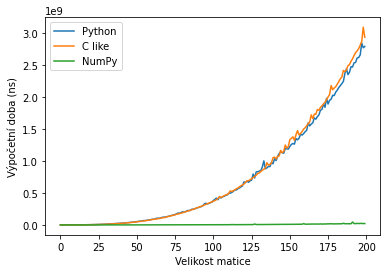

In [3]:
def c_like_function(numbers1, numbers2, length):
    # sourcery skip: sum-comprehension
    final_matrix = [[None]*length for _ in range(length)]

    idxs = list(range(length))

    for i in idxs:
        for j in idxs:
            number = 0

            for k in idxs:
                number += numbers1[i][k] * numbers2[k][j]

            final_matrix[i][j] = number

    return final_matrix

def python_function(numbers1, numbers2, length):
    return list(map(lambda i: list(map(lambda j: sum(numbers1[i][k] * numbers2[k][j] for k in range(length)), range(length))), range(length)))

def numpy_function(numbers1, numbers2):
    return numbers1 @ numbers2

def run():
    results_a = []
    results_b = []
    results_c = []
    numbers = list(range(1, 201))

    for i in numbers:
        print(f'{i}x{i}')

        matrix1 = generate_numbers(n=i, dimension=2)
        matrix2 = generate_numbers(n=i, dimension=2)
        np_arary1 = array(matrix1)
        np_arary2 = array(matrix2)

        mat_numpy_result = exec_time(numpy_function, np_arary1, np_arary2)
        mat_python_result = exec_time(python_function, matrix1, matrix2, i)
        mat_c_like_result = exec_time(c_like_function, matrix1, matrix2, i)

        if not are_matrixes_equal(mat_python_result, mat_numpy_result, mat_c_like_result):
            print(mat_c_like_result.result, mat_python_result.result, mat_numpy_result.result)
            raise ValueError(f"Matrixes are not same {i}")

        results_a.append(mat_python_result.time)
        results_b.append(mat_c_like_result.time)
        results_c.append(mat_numpy_result.time)

    plot(results_a, label='Python')
    plot(results_b, label='C like')
    plot(results_c, label='NumPy')

    legend()
    
    xlabel('Velikost matice')
    ylabel('Výpočetní doba (ns)')

    savefig('matrix multiplication.png', dpi=2000)

if __name__ == "__main__":
    run()

### Součet matic:


In [4]:
def c_like_function(numbers1, numbers2, length):
    # sourcery skip: sum-comprehension
    final_matrix = [[None]*length for _ in range(length)]

    idxs = list(range(length))

    for i in idxs:
        for j in idxs:
            final_matrix[i][j] = numbers1[i][j] + numbers2[i][j]

    return final_matrix

def python_function(numbers1, numbers2, length):
    return list(map(lambda i: list(map(lambda j: numbers1[i][j] + numbers2[i][j], range(length))), range(length)))

def numpy_function(numbers1, numbers2):
    return numbers1 + numbers2

def run():
    results_a = []
    results_b = []
    results_c = []

    for i in range(5, 755, 5):
        print(f'{i}x{i}')

        matrix1 = generate_numbers(n=i, dimension=2)
        matrix2 = generate_numbers(n=i, dimension=2)
        np_arary1 = array(matrix1)
        np_arary2 = array(matrix2)

        mat_numpy_result = exec_time(numpy_function, np_arary1, np_arary2)
        mat_python_result = exec_time(python_function, matrix1, matrix2, i)
        mat_c_like_result = exec_time(c_like_function, matrix1, matrix2, i)

        if not are_matrixes_equal(mat_python_result, mat_numpy_result, mat_c_like_result):
            print(mat_c_like_result.result)
            print(mat_python_result.result)
            print(mat_numpy_result.result)
            
            raise ValueError(f"MAtice nejsou stejné {i}")

        results_a.append(mat_python_result.time)
        results_b.append(mat_c_like_result.time)
        results_c.append(mat_numpy_result.time)

    plot(results_a, label='Python')
    plot(results_b, label='C like')
    plot(results_c, label='NumPy')

    legend()
    
    xlabel('Velikost matice')
    ylabel('Výpočetní doba (ns)')

    savefig('matrix sumarization.png', dpi=2000)

if __name__ == "__main__":
    run()


5x5
10x10
15x15
20x20
25x25
30x30
35x35
40x40
45x45
50x50
55x55
60x60
65x65
70x70
75x75
80x80
85x85
90x90
95x95
100x100
105x105
110x110
115x115
120x120
125x125
130x130
135x135
140x140
145x145
150x150
155x155
160x160
165x165
170x170
175x175
180x180
185x185
190x190
195x195
200x200
205x205
210x210
215x215
220x220
225x225
230x230
235x235
240x240
245x245
250x250
255x255
260x260
265x265
270x270
275x275
280x280
285x285
290x290
295x295
300x300
305x305
310x310
315x315
320x320
325x325
330x330
335x335
340x340
345x345
350x350
355x355
360x360
365x365
370x370
375x375
380x380
385x385
390x390
395x395
400x400
405x405
410x410
415x415
420x420
425x425
430x430
435x435
440x440
445x445
450x450
455x455
460x460
465x465
470x470
475x475
480x480
485x485
490x490
495x495
500x500
505x505
510x510
515x515


KeyboardInterrupt: 

### Derivace

In [ ]:
def fx(x):
    return (6*x**3)*(4+2*x**-2)

def derivace_sym(fx, sym_var, val):
    return diff(fx, sym_var).subs(sym_var, val).doit()

In [ ]:
x0 = 7

sym_var_x = symbols('x')
result = exec_time(lambda fx, x0, h: [derivace_sym(fx, x0, h) for _ in range(1000)][0], fx(sym_var_x), sym_var_x, x0)

print("Knihovna Sympy:")
print(f"Derivace je {result.result} a Doba trvání výpočtu: {result.time}")

result = exec_time(lambda fx, x0, h: [forward_derivate(fx, x0, h) for _ in range(1000)][0], fx, x0, 0.001)

print("Vlastní funkce:")
print(f"Derivace funkce je {result.result} a Doba trvání výpočtu: {(result.time)}")


Knihovna Sympy:
Derivace je 6 a Doba trvání výpočtu: 124997200
Vlastní funkce:
Derivace funkce je 6.000500000002518 a Doba trvání výpočtu: 1001500


### Integrace

In [ ]:
def fx(x):
    return (2*x**2-4*x+4)/4

def my_intagrate(fx, a, b):
    result = 0
    
    x = a
    dx = 0.0001

    while x < b:
        result += dx * (fx(x) + fx((x+dx)))/2
        x += dx

    return result

In [ ]:
a, b = (0, 2)

result = exec_time(lambda fx, a, b: [quad(fx, a, b) for _ in range(100)][0], fx, a, b)

print("Knihovna Scipy:")
print(f"Výpočet integrace je: {result.result[0]} a Doba trvání výpočtu: {result.time}")

result = exec_time(lambda fx, a, b: [my_intagrate(fx, a, b) for _ in range(100)][0], fx, a, b)

print("Vlastní funkce:")
print(f"Výpočet integrace je: {result.result} a Doba trvání výpočtu: {result.time}")

Knihovna Scipy:
Výpočet integrace je: 1.3333333333333335 a Doba trvání výpočtu: 1004200
Vlastní funkce:
Výpočet integrace je: 1.3334333400001694 a Doba trvání výpočtu: 1995988300


### Výpočet faktoriálu

In [ ]:
x = 55200

def my_fact(x):
    result = 1

    for i in range(1, x+1):
        result *= i

    return result

In [ ]:
result = exec_time(factorial, x)

print("Knihovna Math:")
print(f"Faktoriál z čísla {x} je {str(result.result)[:10]} a Doba trvání výpočtu: {result.time}")

result = exec_time(my_fact, x)

print("Vlastní funkce:")
print(f"Faktoriál z čísla {x} je {str(result.result)[:10]} a Doba trvání výpočtu: {result.time}")

Knihovna Math:
Faktoriál z čísla 55200 je 5646115017 a Doba trvání výpočtu: 69047700
Vlastní funkce:
Faktoriál z čísla 55200 je 5646115017 a Doba trvání výpočtu: 841680700
